In [10]:
import os
import json
import pandas as pd
from elasticsearch import Elasticsearch
import cv2
from matplotlib import pyplot as plt


In [7]:
from elasticsearch import helpers
client = Elasticsearch(
    "http://localhost:9200",
     basic_auth=("elastic", "elastic")

)
resp = client.info()

In [3]:
with open('captions\\annotations\captions_val2014.json', 'r') as f:

#f = open("captions\annotations\captions_val2014.json")
    data = json.load(f);

anno_df = pd.DataFrame(data['annotations'])

In [6]:
mapping = {

    "properties": {
        "image_id": {"type": "dict"},
        "id": {"type": "integer"},
        "caption": {"type": "text"},
    }   
}
anno_dict =anno_df.head(10).to_dict()

In [7]:
print(anno_df.head(10))

   image_id   id                                            caption
0    203564   37  A bicycle replica with a clock as the front wh...
1    179765   38  A black Honda motorcycle parked in front of a ...
2    322141   49  A room with blue walls and a white sink and door.
3     16977   89  A car that seems to be parked illegally behind...
4    106140   98  A large passenger airplane flying through the ...
5    106140  101  There is a GOL plane taking off in a partly cl...
6    322141  109   Blue and white color scheme in a small bathroom.
7    322141  121  This is a blue and white bathroom with a wall ...
8    322141  163  A blue boat themed bathroom with a life preser...
9    203564  181                    The bike has a clock as a tire.


In [11]:
i =0

for rec in data['annotations']:
    i = i + 1
    client.index(index="ids",id = i , document=rec)
    if i > 10000:
        break;  

In [4]:
all = client.search(index="ids", query={"match_all": {}})
print("Got %d Hits:" % all['hits']['total']['value'])
for hit in all['hits']['hits']:
    print("%(caption)s %(image_id)s: %(id)s" % hit["_source"])

Got 10000 Hits:
A bicycle replica with a clock as the front wheel. 203564: 37
A black Honda motorcycle parked in front of a garage. 179765: 38
A room with blue walls and a white sink and door. 322141: 49
A car that seems to be parked illegally behind a legally parked car 16977: 89
A large passenger airplane flying through the air. 106140: 98
There is a GOL plane taking off in a partly cloudy sky. 106140: 101
Blue and white color scheme in a small bathroom. 322141: 109
This is a blue and white bathroom with a wall sink and a lifesaver on the wall. 322141: 121
A blue boat themed bathroom with a life preserver on the wall 322141: 163
The bike has a clock as a tire. 203564: 181


In [12]:
query = {
            "match": {
            "caption": "united state of america"
            }
        }
image_ids =[]
image_caption =[]
resp = client.search(index="ids", query=query)
print("Got %d Hits:" % resp['hits']['total']['value'])
for hit in resp['hits']['hits']:
    print("%(caption)s : %(image_id)s : %(id)s" % hit["_source"])
    image_ids.append(hit['_source']['image_id'])
    image_caption.append(hit['_source']['caption'])

Got 2799 Hits:
A motorcycle with United States Marine Corp markings. : 251098 : 131406
a person on motorcycle with a united states flag parked on a street : 320249 : 113642
View of three pieces of a bathroom in tons of beige. : 170041 : 93388
A pile of different types of vegetables on top of each other. : 566687 : 225182
Closeup of view of the cabin and wing of a large commercial airliner. : 217039 : 66631
A view of a mountain is outside of the window of a plane. : 144064 : 205460
A framed picture of a bunch of bananas. : 571518 : 97650
A picture of a lot of motorcycles together. : 321742 : 129192
A picture of a lot of urinels together. : 463459 : 153185
an image of group of people to motorcycles : 104647 : 226131


In [9]:
index = client.get(index="testt-index",id =3)
print(index)

{'_index': 'testt-index', '_id': '3', '_version': 10, '_seq_no': 192619, '_primary_term': 1, 'found': True, '_source': {'image_id': 203564, 'id': 181, 'caption': 'The bike has a clock as a tire.'}}


In [10]:
class image_retrive:
    def __init__(self, image_ids, image_caption):   
        self.cap = image_caption
        self.paths = self.get_images(image_ids )

    def get_images(self, indices):
        img_ids = []
        paths = []
        for i in indices:
            paths.append('..\\..\\Cocomo2014\\\\val2014\\\\val2014\\COCO_val2014_'+ '0'*(12 - len(str(id))) + str(id) +'.jpg')
        return paths

    def display_images(self):
        i = 0
        for path in self.paths:
            plt.figure()
            img = cv2.imread(path);
            plt.imshow(img)
            plt.title(self.cap[i])
            plt.show()
            img = cv2.imread(path, cv2.IMREAD_COLOR)
            i = i + 1
        
        

In [11]:
ir = image_retrive(image_ids,image_caption)
ir.display_images()

NameError: name 'image_ids' is not defined

In [33]:
class sys:
    def __init__(self):
        self.image_ids =[]
        self.image_caption =[]

    def search(self,query):
        query = {
            "bool":{
                "must":
                    [
                        {
                            "match":{"caption":"people"},
                        },
                    ],
                    "must_not":[],
                    "should":[]
                },
                
            }
        resp = client.search(index="cocomo", query=query)
        print("Got %d Hits:" % resp['hits']['total']['value'])
        for hit in resp['hits']['hits']:
          #  print("%(caption)s : %(image_id)s : %(id)s" % hit["_source"])
            self.image_ids.append(hit['_source']['image_id'])
            self.image_caption.append(hit['_source']['caption'])
        self.display();
        
    def display(self):
       # i = 0
        plt.figure(figsize=(25,50))
        columns = 2
        for i, id in enumerate(self.image_ids):
            plt.subplot(int(len(self.image_ids) / columns + 1), columns, i + 1)
            path = '..\\..\\Cocomo2014\\\\val2014\\\\val2014\\COCO_val2014_'+ '0'*(12 - len(str(id))) + str(id) +'.jpg'
            img = cv2.imread(path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            plt.title(self.image_caption[i])
            plt.imshow(img)
ir = sys();


Got 10000 Hits:


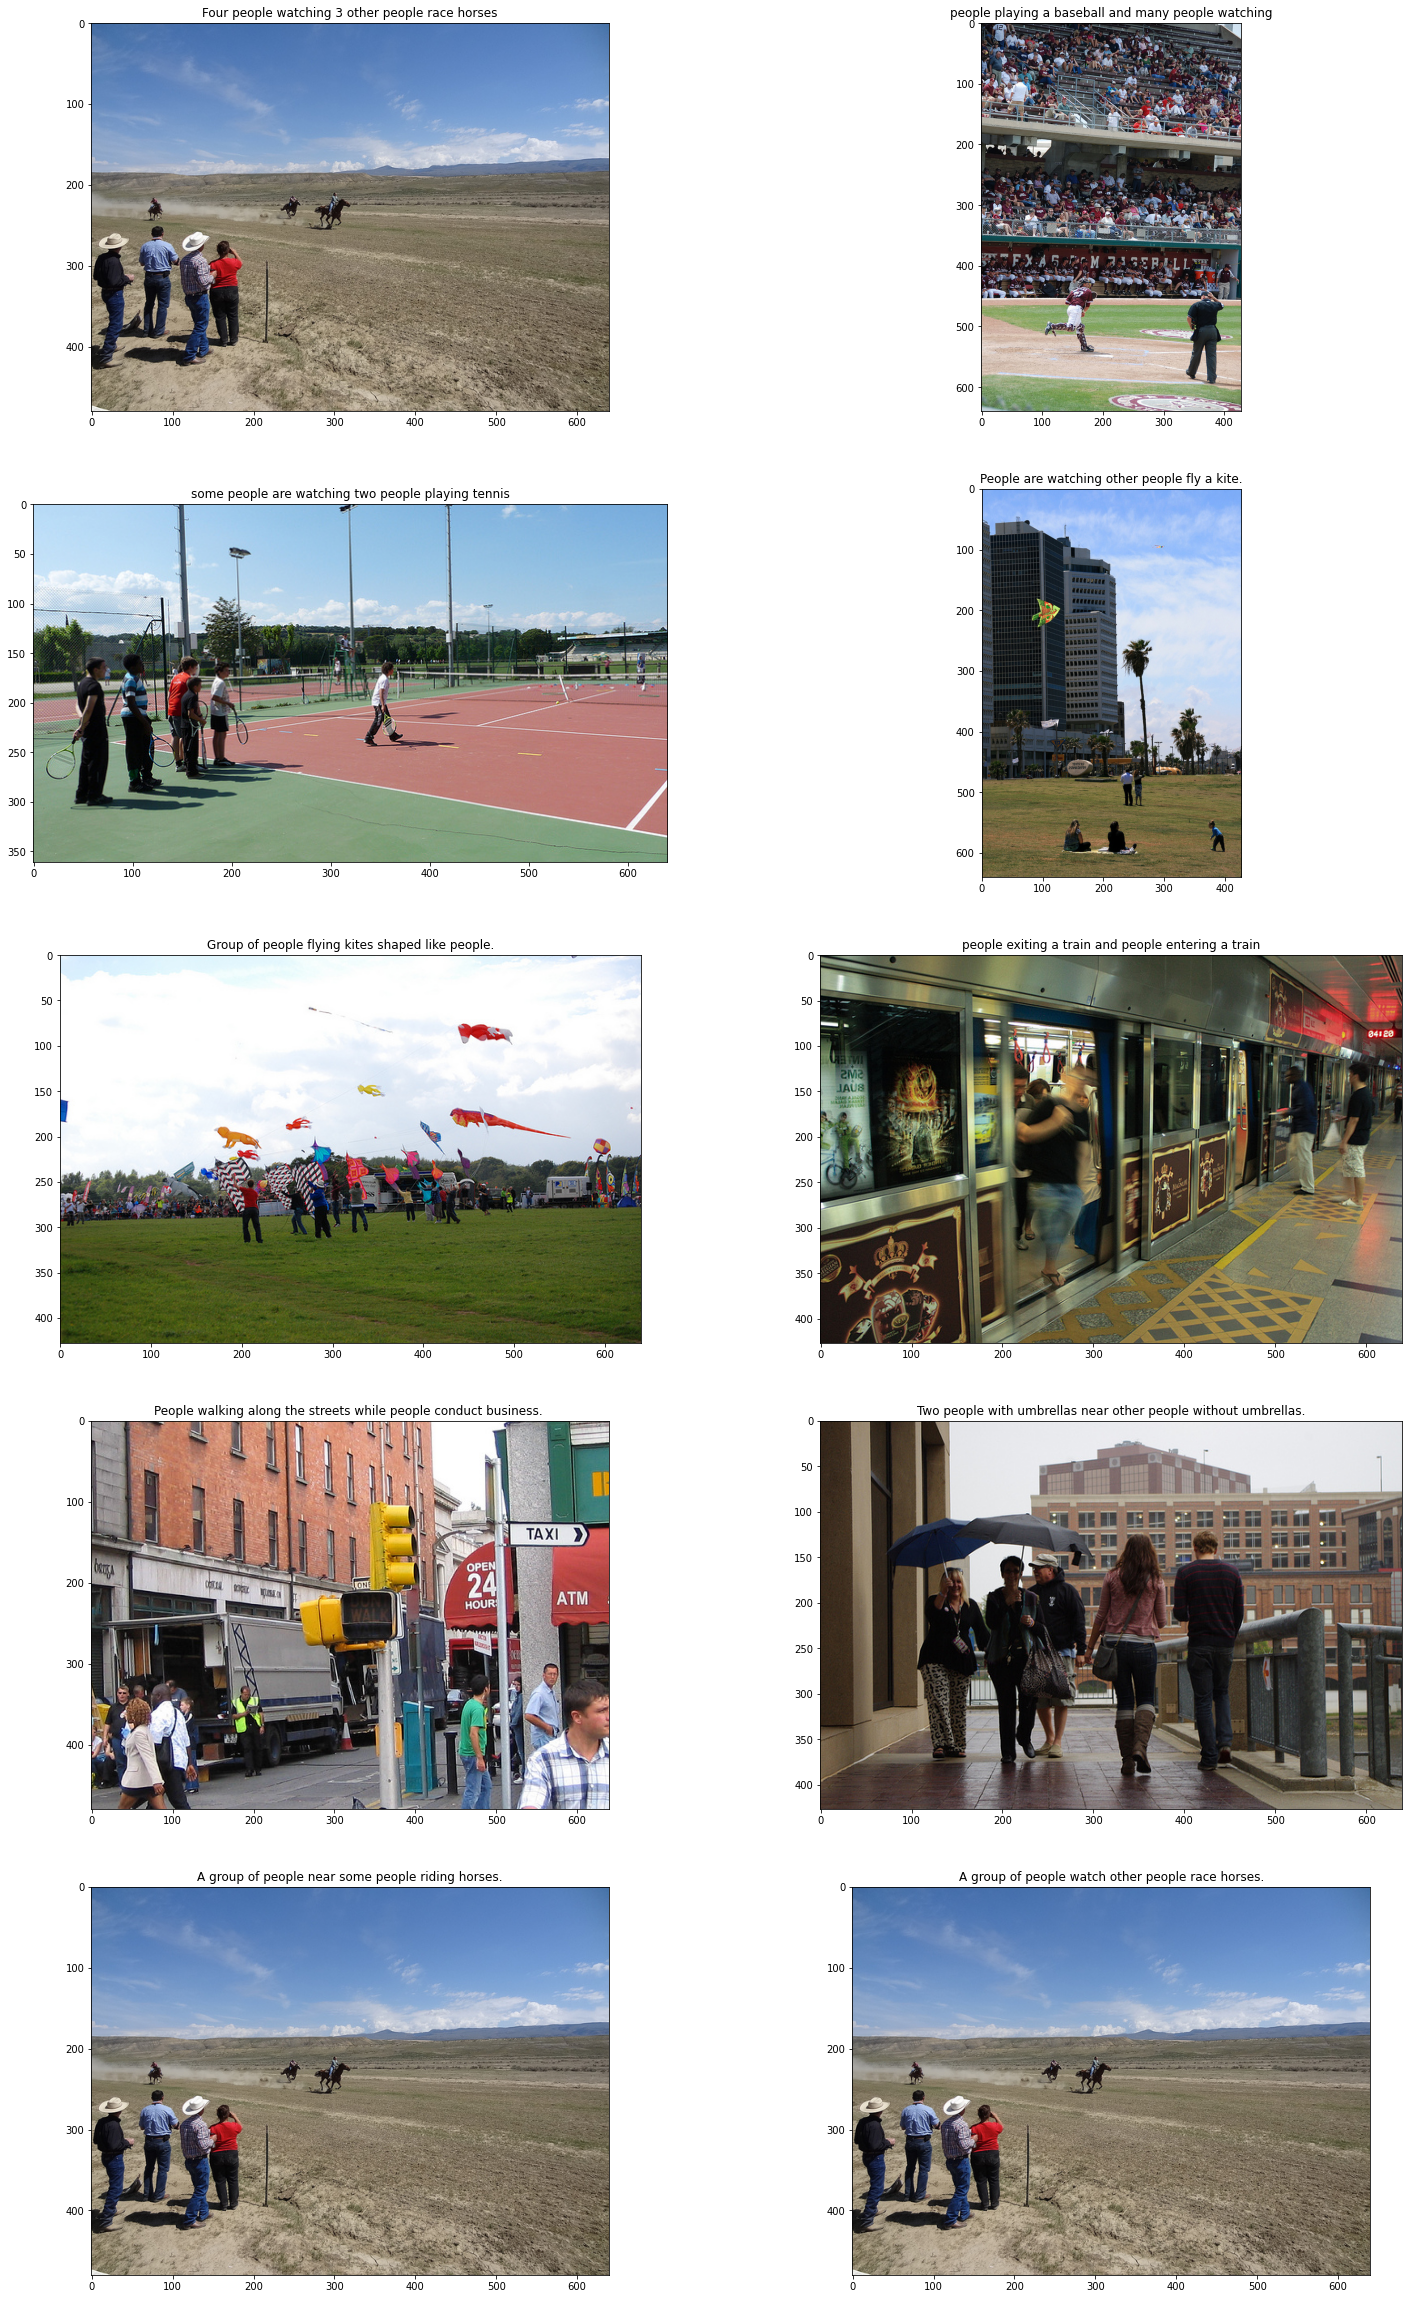

In [34]:

ir.search('two people')